In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import ast

In [3]:
os.chdir("/home/sergio/Documents/json_experiments")

## Leyendo los resultados del modelo con 180 epocas, nadam, 0.001 y luego 0.0001 con pesos 2,1,4,1

In [67]:

#res = json.loads(test_string) 
with open('history_finetuning_2141_50_epoch_nadam_0dot001.json') as json_file:
    data_finetuning_part1 = json.load(json_file)
    data_finetuning_part1 = ast.literal_eval(data_finetuning_part1)

with open('history_finetuning_2141_50_to_80_epoch_nadam_0dot001.json') as json_file:
    data_finetuning_part2 = json.load(json_file)   
    data_finetuning_part2 = ast.literal_eval(data_finetuning_part2)
    
with open('history_finetuning_2141_80_to_90_epoch_nadam_0dot001.json') as json_file:
    data_finetuning_part3 = json.load(json_file)   
    data_finetuning_part3 = ast.literal_eval(data_finetuning_part3)
    
with open('history_finetuning_2141_90_to_140_epoch_nadam_0dot001.json') as json_file:
    data_finetuning_part4 = json.load(json_file)   
    data_finetuning_part4 = ast.literal_eval(data_finetuning_part4) 
    
with open('history_finetuning_2141_140_to_160_epoch_nadam_0dot001.json') as json_file:
    data_finetuning_part5 = json.load(json_file)   
    data_finetuning_part5 = ast.literal_eval(data_finetuning_part5)    
    
with open('history_finetuning_2141_160_to_180_epoch_nadam_0dot0001.json') as json_file:
    data_finetuning_part6 = json.load(json_file)   
    data_finetuning_part6 = ast.literal_eval(data_finetuning_part6)    

In [68]:
data_finetuning_part1.keys()

dict_keys(['loss', 'output_1_loss', 'output_2_loss', 'output_3_loss', 'output_4_loss', 'output_3_precision', 'output_3_recall', 'output_3_true_negatives', 'output_3_true_positives', 'output_3_false_negatives', 'output_3_false_positives', 'val_loss', 'val_output_1_loss', 'val_output_2_loss', 'val_output_3_loss', 'val_output_4_loss', 'val_output_3_precision', 'val_output_3_recall', 'val_output_3_true_negatives', 'val_output_3_true_positives', 'val_output_3_false_negatives', 'val_output_3_false_positives'])

In [69]:
ds = [data_finetuning_part1, data_finetuning_part2,data_finetuning_part3,data_finetuning_part4,data_finetuning_part5,data_finetuning_part6]
d = {}
for k in data_finetuning_part1.keys():
    d[k] = []
    d[k] += [d[k] for d in ds]
    
for k in d:
    d[k] = [y for x in d[k] for y in x]

## Leyendo los resultados del modelo con 180 epocas, nadam, 0.001 y luego 0.0001 con pesos 1,2,4,1 y 1,4,4,1 a partir de la epoca 80

In [70]:
#res = json.loads(test_string) 
with open('history_finetuning_1241_10_epoch_nadam_0dot001_msle.json') as json_file:
    data_finetuning_part1 = json.load(json_file)
    data_finetuning_part1 = ast.literal_eval(data_finetuning_part1)

with open('history_finetuning_1241_10_60_epoch_nadam_0dot001_msle.json') as json_file:
    data_finetuning_part2 = json.load(json_file)   
    data_finetuning_part2 = ast.literal_eval(data_finetuning_part2)
    
with open('history_finetuning_1241_60_80_epoch_nadam_0dot0001_msle.json') as json_file:
    data_finetuning_part3 = json.load(json_file)   
    data_finetuning_part3 = ast.literal_eval(data_finetuning_part3)
    
with open('history_finetuning_1441_80_100_epoch_nadam_0dot0001_msle.json') as json_file:
    data_finetuning_part4 = json.load(json_file)   
    data_finetuning_part4 = ast.literal_eval(data_finetuning_part4) 
'''    
with open('history_finetuning_2141_140_to_160_epoch_nadam_0dot001_msle.json') as json_file:
    data_finetuning_part5 = json.load(json_file)   
    data_finetuning_part5 = ast.literal_eval(data_finetuning_part5)    
    
with open('history_finetuning_2141_160_to_180_epoch_nadam_0dot0001_msle.json') as json_file:
    data_finetuning_part6 = json.load(json_file)   
    data_finetuning_part6 = ast.literal_eval(data_finetuning_part6)  
'''

"    \nwith open('history_finetuning_2141_140_to_160_epoch_nadam_0dot001_msle.json') as json_file:\n    data_finetuning_part5 = json.load(json_file)   \n    data_finetuning_part5 = ast.literal_eval(data_finetuning_part5)    \n    \nwith open('history_finetuning_2141_160_to_180_epoch_nadam_0dot0001_msle.json') as json_file:\n    data_finetuning_part6 = json.load(json_file)   \n    data_finetuning_part6 = ast.literal_eval(data_finetuning_part6)  \n"

In [82]:
ds = [data_finetuning_part1, data_finetuning_part2,data_finetuning_part3,data_finetuning_part4]
d2 = {}
for k in data_finetuning_part1.keys():
    d2[k] = []
    d2[k] += [d2[k] for d in ds]
    
for k in d2:
    d2[k] = [y for x in d2[k] for y in x]

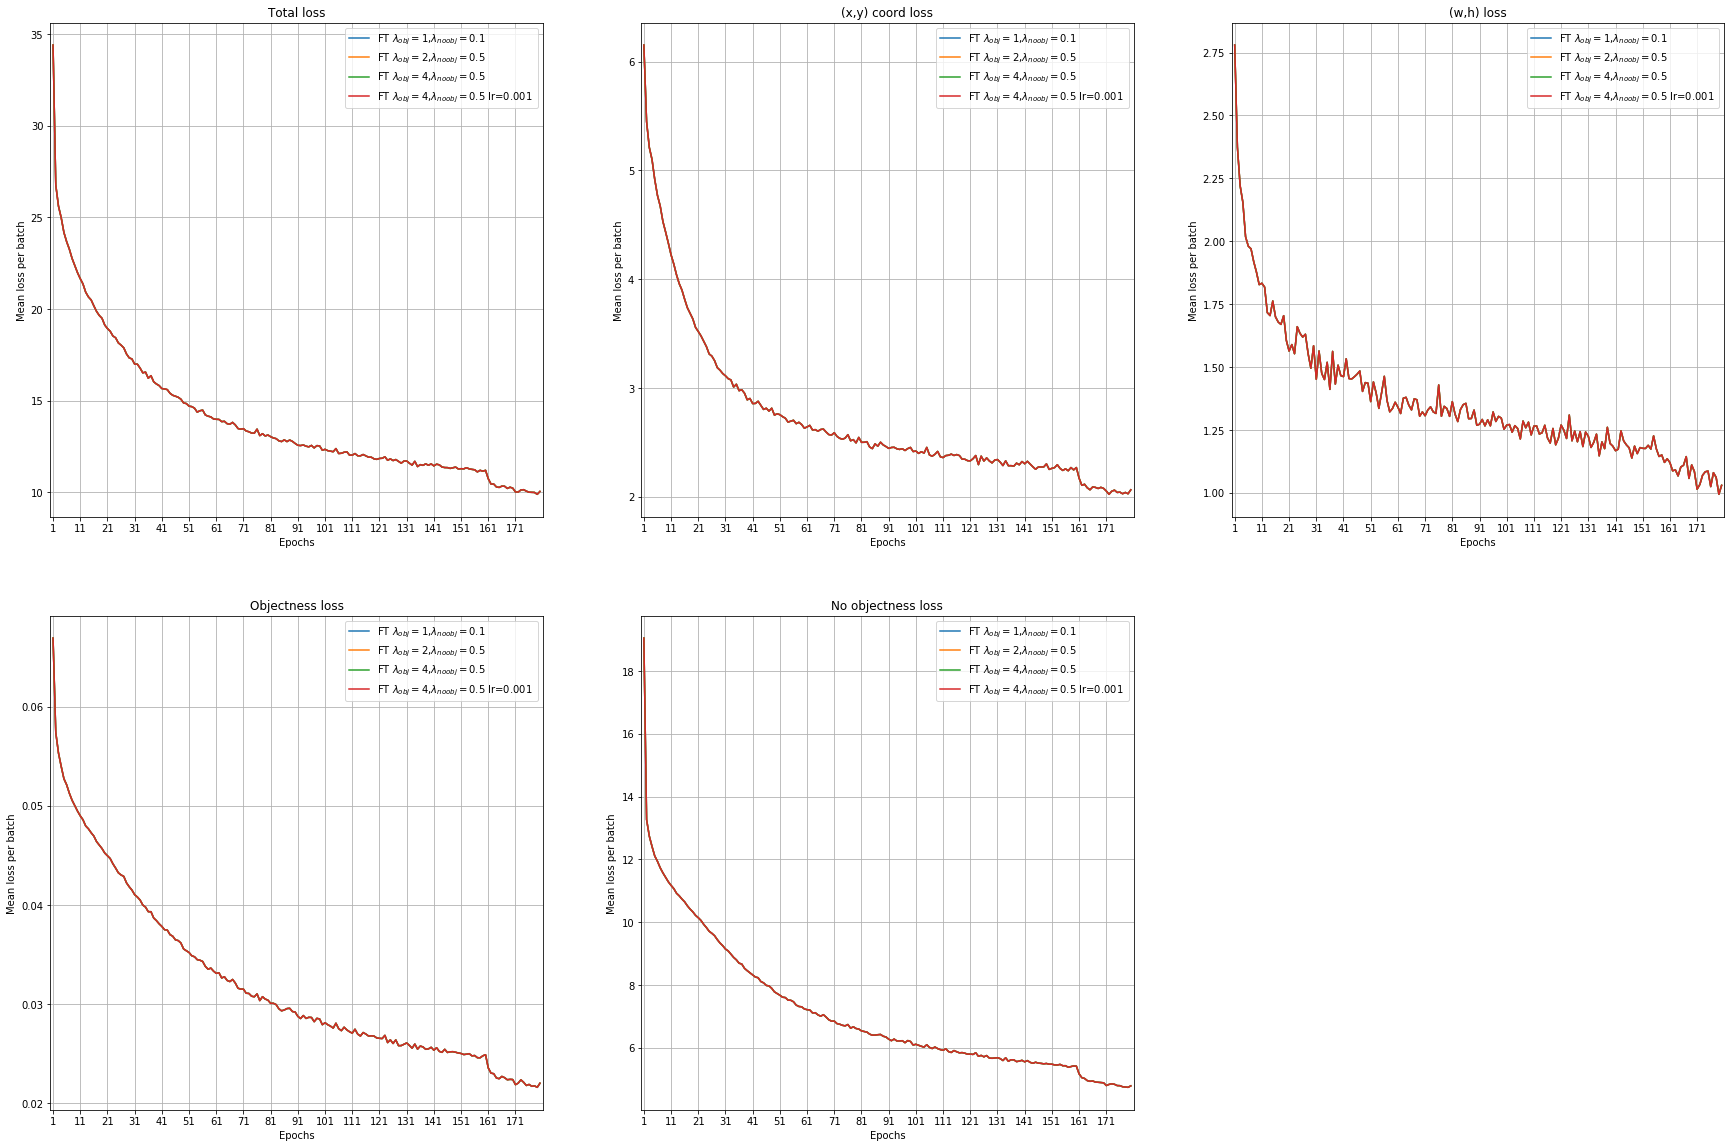

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]

titles = ["Total loss","(x,y) coord loss","(w,h) loss","Objectness loss","No objectness loss"]
for num,(i,j,k,m) in enumerate(zip(d.keys(),d.keys(),d.keys(),d.keys())):
    if num<5:
        plt.subplot(2,3,num+1)
        plt.xlim([0,181])
        #plt.ylim([0,40])
        plt.xticks(np.arange(1,181,10))
        plt.grid()
        plt.title(titles[num])
        plt.ylabel("Mean loss per batch")
        plt.xlabel("Epochs")
        plt.plot(np.arange(1,181,1),d[i],label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
        plt.plot(np.arange(1,181,1),d[j],label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,181,1),d[k],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,181,1),d[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
        plt.legend()
    

5
6
7
8
9
10


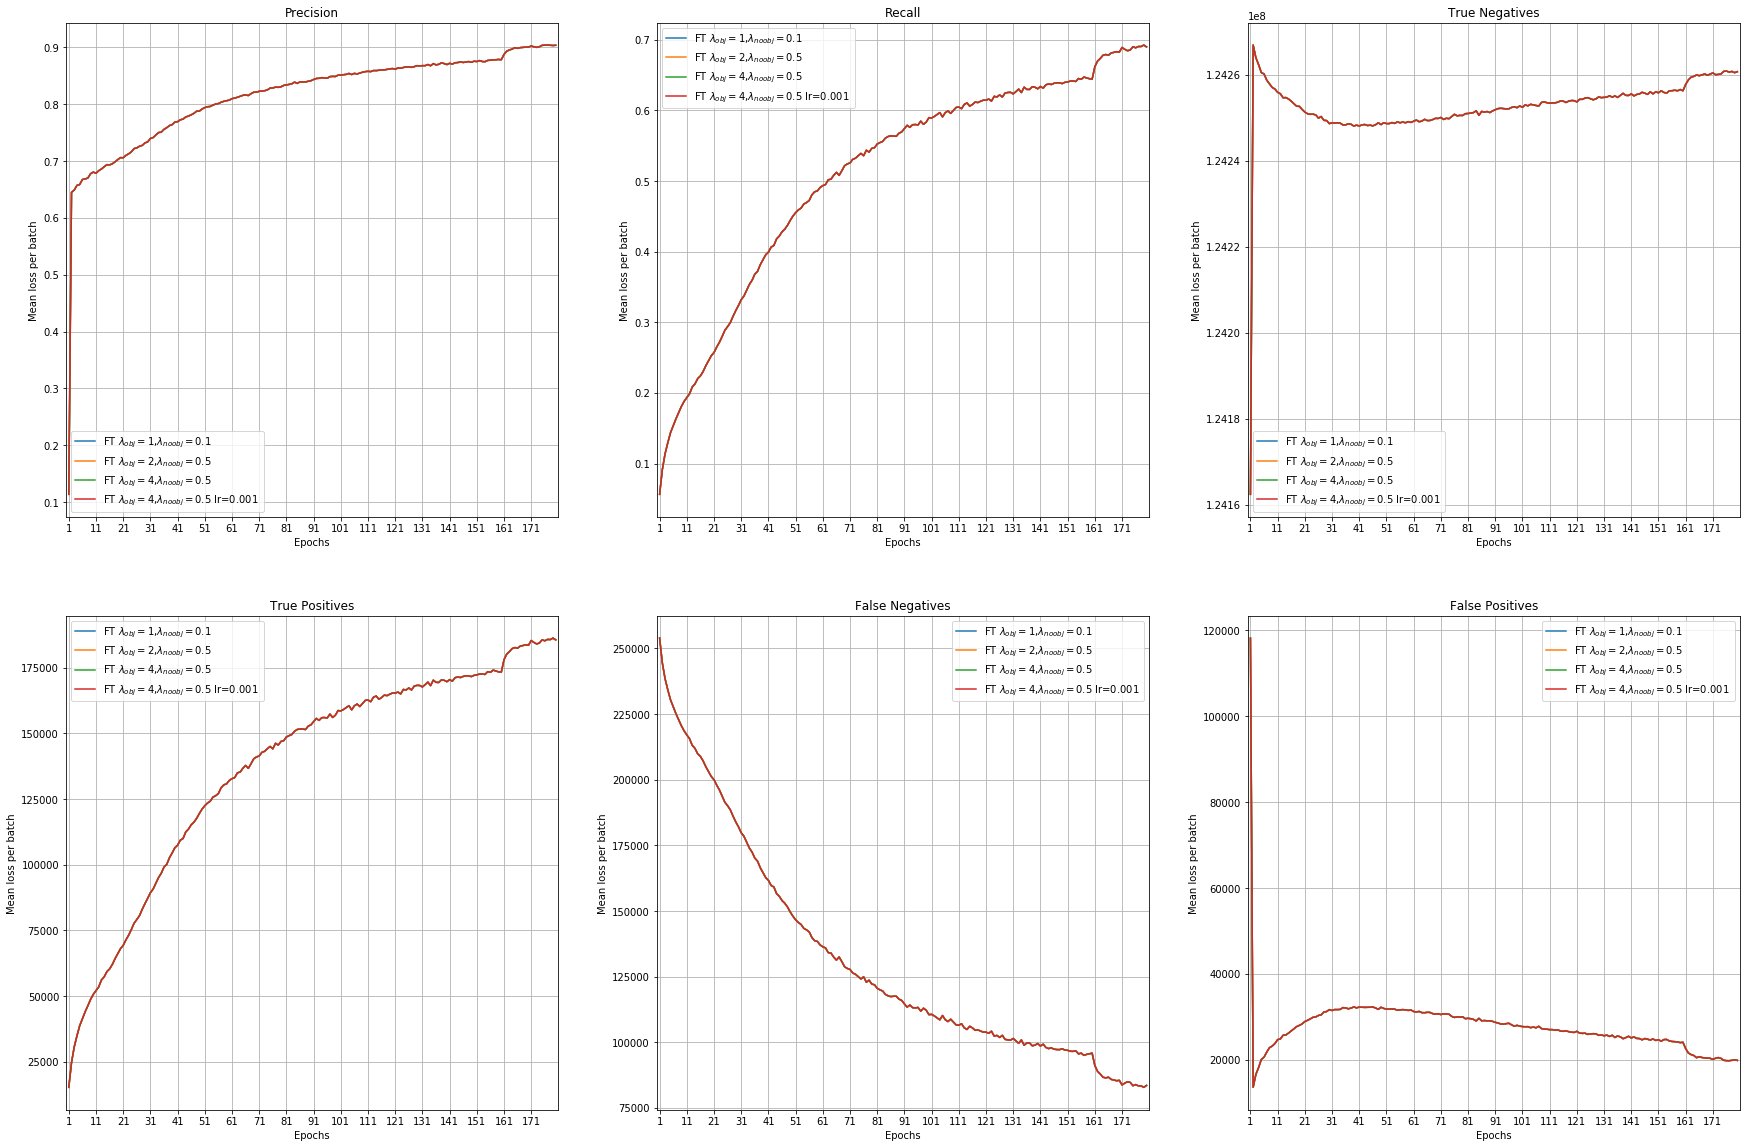

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]

titles = ["Precision","Recall","True Negatives","True Positives","False Negatives","False Positives"]
for num,(i,j,k,m) in enumerate(zip(d.keys(),d.keys(),d.keys(),d.keys())):
    if num>=5 and num<11:
        print(num)
        plt.subplot(2,3,num-4)
        plt.xlim([0,181])
        plt.xticks(np.arange(1,181,10))
        plt.grid()
        plt.title(titles[num-5])
        plt.ylabel("Mean loss per batch")
        plt.xlabel("Epochs")
        if num==7:
            plt.plot(np.arange(1,181,1),np.array(d[i]),label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
            plt.plot(np.arange(1,181,1),np.array(d[j]),label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
            plt.plot(np.arange(1,181,1),np.array(d[k]),label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")
            plt.plot(np.arange(1,181,1),d[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
        else:
            plt.plot(np.arange(1,181,1),d[i],label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
            plt.plot(np.arange(1,181,1),d[j],label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
            plt.plot(np.arange(1,181,1),d[k],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")     
            plt.plot(np.arange(1,181,1),d[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
        plt.legend()

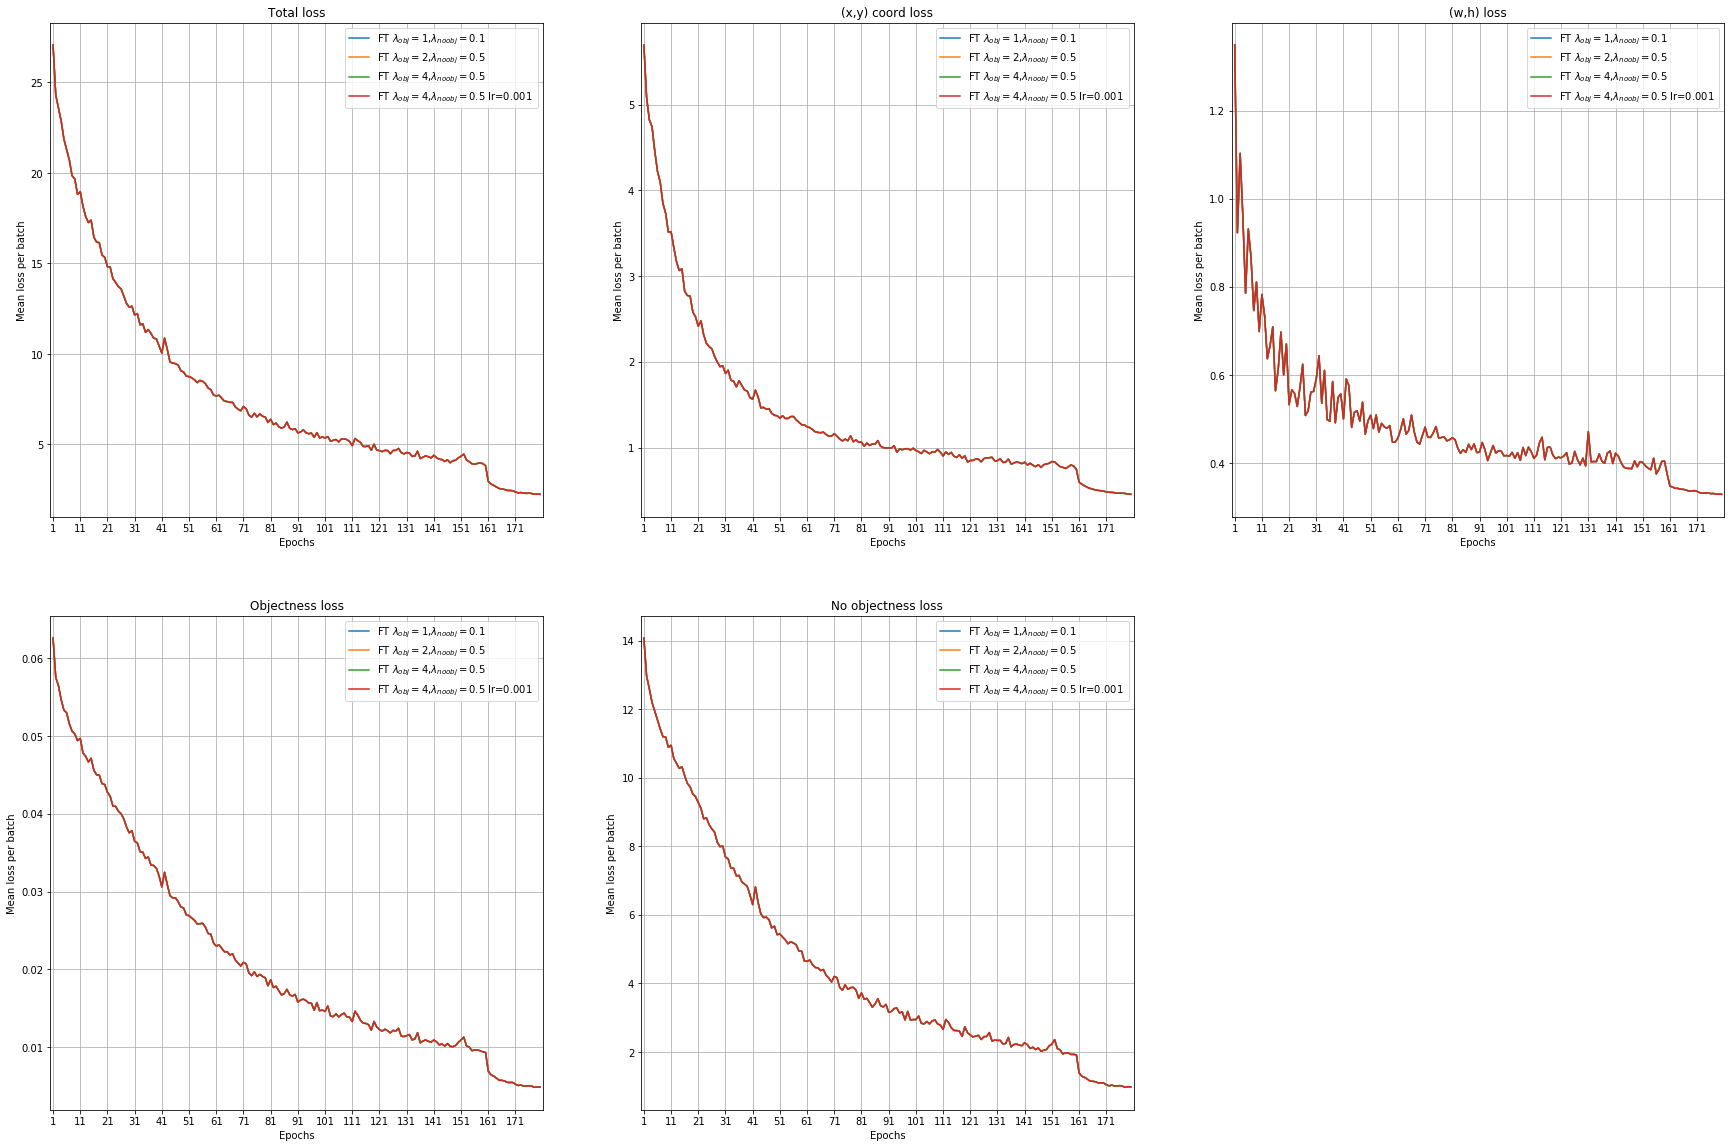

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
epochs = 180+1
titles = ["Total loss","(x,y) coord loss","(w,h) loss","Objectness loss","No objectness loss"]
for num,(i,j,k,m) in enumerate(zip(d.keys(),d.keys(),d.keys(),d.keys())):
    if num>=11 and num <16:
        plt.subplot(2,3,num-10)
        plt.xlim([0,epochs])
        plt.xticks(np.arange(1,epochs,10))
        plt.grid()
        plt.title(titles[num-11])
        plt.ylabel("Mean loss per batch")
        plt.xlabel("Epochs")
        plt.plot(np.arange(1,epochs,1),d[i],label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
        plt.plot(np.arange(1,epochs,1),d[j],label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,epochs,1),d[k],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,epochs,1),d[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
        plt.legend()

16
17
18
19
20
21


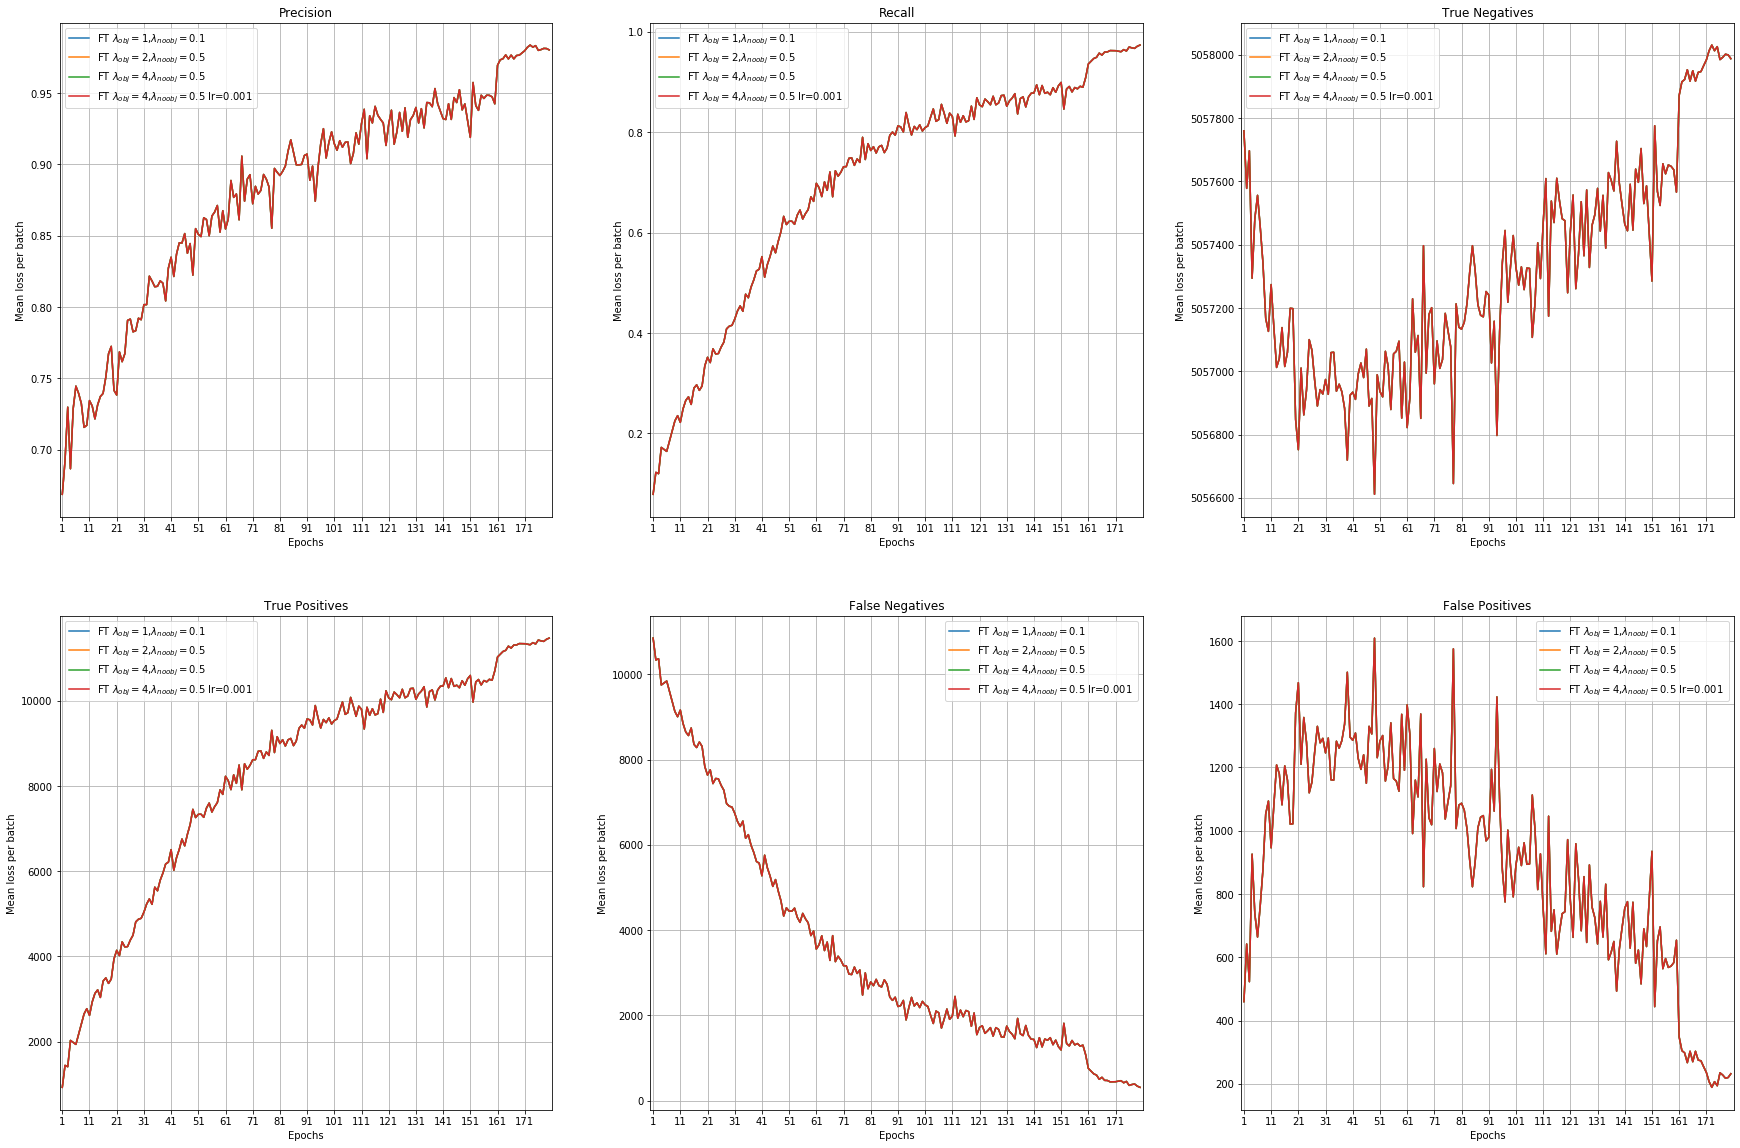

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
epochs =180+1
titles = ["Precision","Recall","True Negatives","True Positives","False Negatives","False Positives"]
for num,(i,j,k,m) in enumerate(zip(d.keys(),d.keys(),d.keys(),d.keys())):
    if num>=16:
        print(num)
        plt.subplot(2,3,num-15)
        plt.xlim([0,epochs])
        plt.xticks(np.arange(1,epochs,10))
        plt.grid()
        plt.title(titles[num-16])
        plt.ylabel("Mean loss per batch")
        plt.xlabel("Epochs")

        plt.plot(np.arange(1,epochs,1),np.array(d[i]),label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
        plt.plot(np.arange(1,epochs,1),np.array(d[j]),label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,epochs,1),np.array(d[k]),label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,epochs,1),d[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
      
        plt.legend()

16
17
18
19
20
21


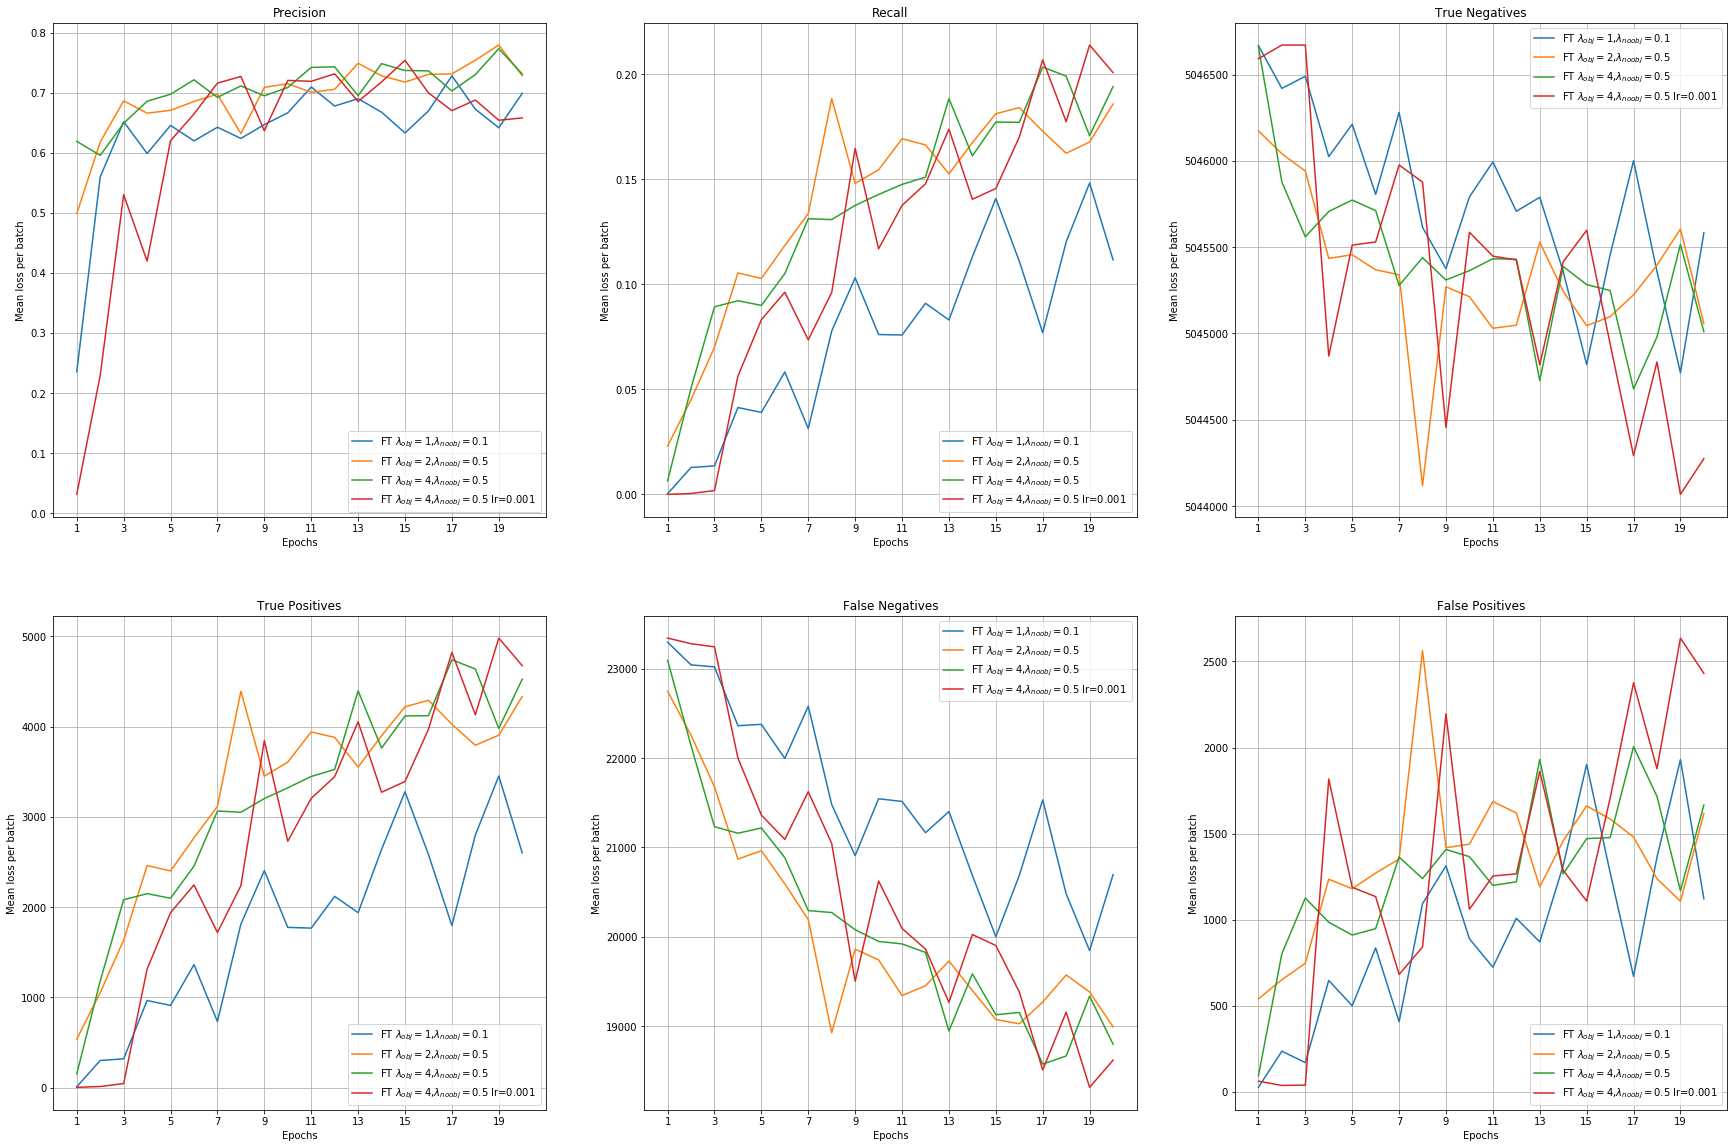

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]

titles = ["Precision","Recall","True Negatives","True Positives","False Negatives","False Positives"]
for num,(i,j,k,m) in enumerate(zip(data_finetuning_0dot1.keys(),data_finetuning_2_0dot5.keys(),data_finetuning_4_0dot5.keys(),data_finetuning_4_0dot5_lr_0dot001.keys())):
    if num>=16:
        print(num)
        plt.subplot(2,3,num-15)
        plt.xlim([0,21])
        plt.xticks(np.arange(1,21,2))
        plt.grid()
        plt.title(titles[num-16])
        plt.ylabel("Mean loss per batch")
        plt.xlabel("Epochs")

        plt.plot(np.arange(1,21,1),np.array(data_finetuning_0dot1[i]),label="FT $\lambda_{obj}=1$,$\lambda_{noobj}=0.1$ ")
        plt.plot(np.arange(1,21,1),np.array(data_finetuning_2_0dot5[j]),label="FT $\lambda_{obj}=2$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,21,1),np.array(data_finetuning_4_0dot5[k]),label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ ")
        plt.plot(np.arange(1,21,1),history_finetuning_4_0dot5_20_epoch_rmsprop_0dot001[m],label="FT $\lambda_{obj}=4$,$\lambda_{noobj}=0.5$ lr=0.001 ")
      
        plt.legend()